In [1]:
# Imports
import matplotlib.pyplot   as plt
import numpy               as np
import openseespy.opensees as ops
import pprint
import vfo.vfo             as vfo
import sys

from datetime import  datetime
from polars   import (Int8, 
                      Float32, 
                      Float64, 
                      Boolean)

from dataset.generation.generator import (StructuralDatasetGenerator,
                                          PlanarTrussGenerator,
                                          LinearCantileverTrussGenerator,
                                          LinearTwoBarTruss)
from dataset.generation.analysis  import LinearAnalysis
from visualization                import ops_plot

np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(linewidth=sys.maxsize)
np.set_printoptions(formatter={'float_kind':
                                   lambda x:
                                   f"{x:.2e}".rjust(11, ' ') if abs(x) > 1e-4
                                   else "0.".rjust(11, ' ') if x == 0 else "~0.".rjust(11, ' ')})

In [8]:
structure_df = LinearTwoBarTruss({
    'parameters': {
        'length': {
            'default': {'type': 'UNIFORM', 'parameters': (2., 10.)}
        },
        'height': {
            'default': {'type': 'UNIFORM', 'parameters': (2., 10.)}
        },
        'supports': {
            '0-x': {'type': 'CONSTANT', 'parameters': (1,)},
            '0-y': {'type': 'CONSTANT', 'parameters': (1,)},
            '1-x': {'type': 'CONSTANT', 'parameters': (1,)},
            '1-y': {'type': 'CONSTANT', 'parameters': (1,)},
        },
        'youngs':{
            'default': {'type': 'UNIFORM_CONST', 'parameters': (70.e9, 200.e9)}
        },
        'loads': {
            '2-y': {'type': 'DISTRIBUTION', 'parameters': ('load',)},
        }
    },
    'distributions': {
        'load': {'type': 'CONSTANT', 'parameters': (-500.e3,)},
    }
}
)

In [10]:
structure_df.save(size=100_000)

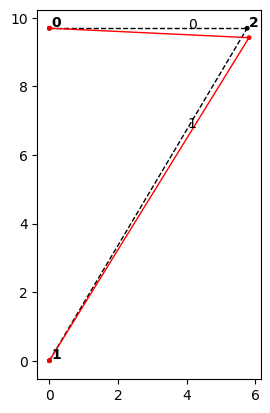

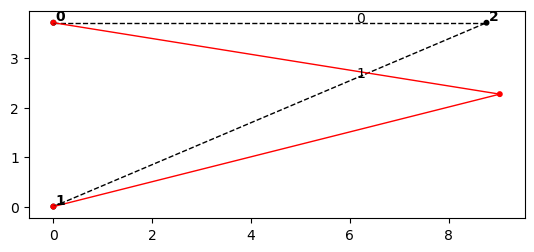

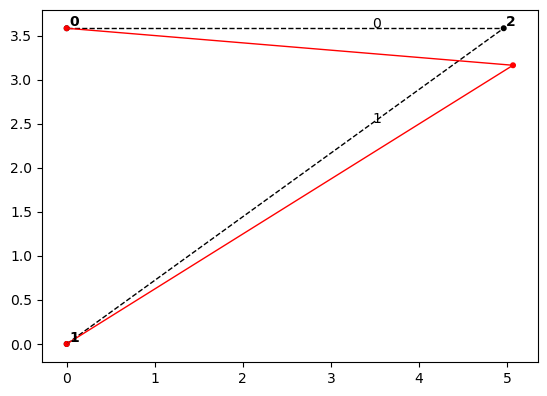

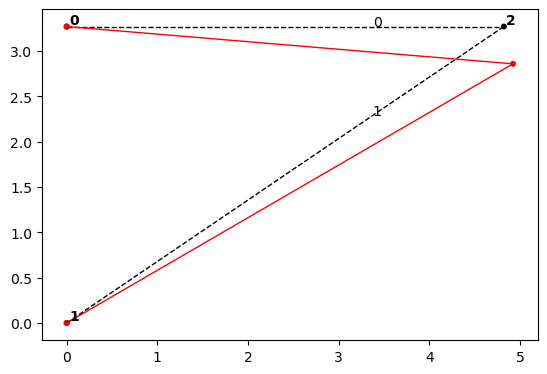

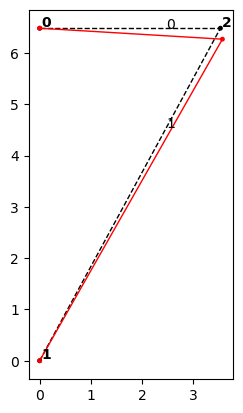

In [9]:
for i in structure_df.__iter__(5):
    ops_plot.plot()